# Linear Regression

![](img/linear_regression.png "Text to show on mouseover")

Small intro text.

In [1]:
# Importing

import numpy as np
import matplotlib.pyplot as plt

# Plotting parameters

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

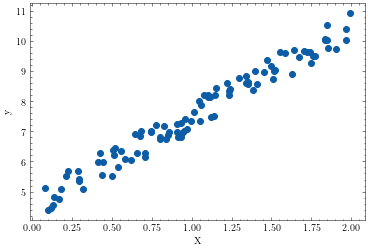

In [2]:
# Generating data

X = 2* np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Normal Equation

In [11]:
# Normal equation

class NormalLinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X_b = np.c_[(np.ones((X.shape[0], X.shape[1])), X)]
        self.theta_ = np.linalg.inv(X_b.T@X_b)@X_b.T@y
    
    def predict(self, X):
        X_b = np.c_[(np.ones((X.shape[0], X.shape[1])), X)]
        return X_b @ self.theta_

In [12]:
lin_reg = NormalLinearRegression()
lin_reg.fit(X, y)

In [13]:
# Our parameters estimations is pretty close from the original (4,3) parameters

print(lin_reg.theta_)

[[4.51179385]
 [3.00210904]]


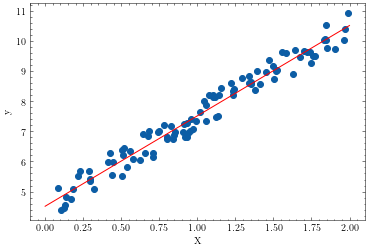

In [14]:
# Lets predict two points at the extremes to make a line plot

X_new = np.array([[0],
                  [2]])

y_pred = lin_reg.predict(X_new)

# Plot

plt.scatter(X, y, label='Data')
plt.plot(X_new, y_pred, c='r', label='Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [15]:
# This method doesn't work if X.T @ X is singular
# In practice, sklearn uses SVD to compute a pseudo inverse which is faster and more reliable

In [25]:
# Comparing sklearn with our implementation

from sklearn.linear_model import LinearRegression

sk_lin_reg = LinearRegression()
sk_lin_reg.fit(X, y)


y_sk = sk_lin_reg.predict(X)
y_frank = lin_reg.predict(X)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y, y_sk))
print(r2_score(y, y_sk))

0.09246558148806061
0.9642220390818911


In [27]:
print(mean_squared_error(y, y_frank))
print(r2_score(y, y_frank))

0.09246558148806061
0.9642220390818911


In [28]:
# Gradient Descent